In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df=pd.read_csv("Housing.csv")
print(df.head())

      price  area  bedrooms  ...  parking  prefarea furnishingstatus
0  13300000  7420         4  ...        2       yes        furnished
1  12250000  8960         4  ...        3        no        furnished
2  12250000  9960         3  ...        2       yes   semi-furnished
3  12215000  7500         4  ...        3       yes        furnished
4  11410000  7420         4  ...        2        no        furnished

[5 rows x 13 columns]


In [17]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [18]:
categorical_cols=['mainroad','guestroom', 'basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
df=pd.get_dummies(df,columns=categorical_cols,drop_first=True)

In [19]:
X=df.drop('price',axis=1)
y=df['price']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=model.predict(X_test)

In [23]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [24]:
print("\nModel Evaluation:")
print("MAE:",mae)
print("MSE:",mse)
print("R² Score:",r2)


Model Evaluation:
MAE: 970043.4039201636
MSE: 1754318687330.6638
R² Score: 0.6529242642153184


In [25]:
coeff_df=pd.DataFrame(model.coef_,index=X.columns,columns=["Coefficient"])
print("\nModel Coefficients:\n",coeff_df)


Model Coefficients:
                                   Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
parking                          2.248419e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
basement_yes                     3.902512e+05
hotwaterheating_yes              6.846499e+05
airconditioning_yes              7.914267e+05
prefarea_yes                     6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


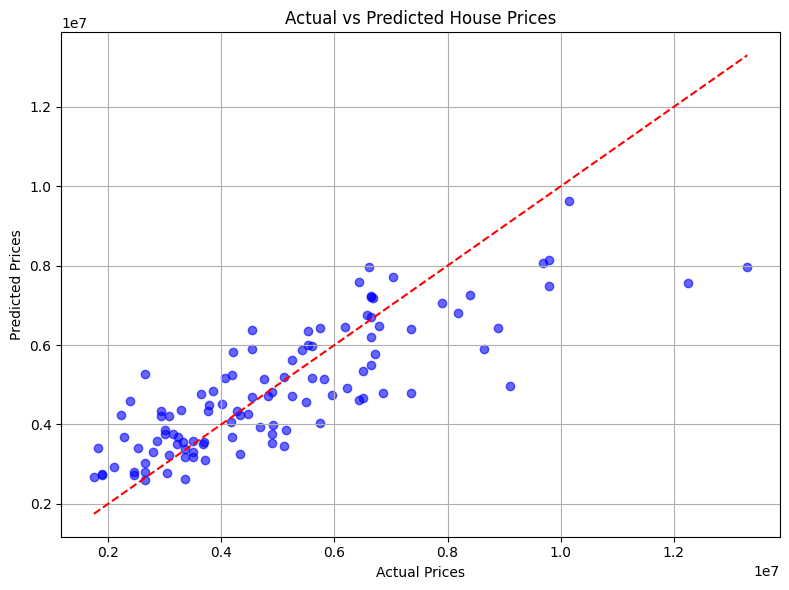

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.6,color='blue')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()